In [1]:
!pip install tsplib95

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [272]:
import random
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib
import tsplib95 as tsp
import matplotlib.pyplot as plt

In [338]:
problem = tsp.load("/content/bayg29.txt")

In [339]:
problem.name

'bayg29'

In [340]:
G = problem.get_graph()

In [341]:
print(G[2][1])

{'weight': 97, 'is_fixed': False}


In [342]:
problem.node_coords

{1: [1150.0, 1760.0],
 2: [630.0, 1660.0],
 3: [40.0, 2090.0],
 4: [750.0, 1100.0],
 5: [750.0, 2030.0],
 6: [1030.0, 2070.0],
 7: [1650.0, 650.0],
 8: [1490.0, 1630.0],
 9: [790.0, 2260.0],
 10: [710.0, 1310.0],
 11: [840.0, 550.0],
 12: [1170.0, 2300.0],
 13: [970.0, 1340.0],
 14: [510.0, 700.0],
 15: [750.0, 900.0],
 16: [1280.0, 1200.0],
 17: [230.0, 590.0],
 18: [460.0, 860.0],
 19: [1040.0, 950.0],
 20: [590.0, 1390.0],
 21: [830.0, 1770.0],
 22: [490.0, 500.0],
 23: [1840.0, 1240.0],
 24: [1260.0, 1500.0],
 25: [1280.0, 790.0],
 26: [490.0, 2130.0],
 27: [1460.0, 1420.0],
 28: [1260.0, 1910.0],
 29: [360.0, 1980.0]}

In [343]:
def create_route(G):
  route = random.sample(G.nodes,len(G.nodes)) #possibly random.choice for cerinta extra
  # route = random.choice
  return route
def create_population(popSize, G):
  pop = []
  for i in range(0,popSize):
    pop.append(create_route(G))
  return pop

In [344]:
def route_distance(route,G):
  distance = 0
  for i in range(0, len(route)):
    fromCity=i
    if i+1 < len(route):
      toCity=i+1
      distance = distance + G[route[fromCity]][route[toCity]]['weight']
    else:
      distance += G[route[fromCity]][route[0]]['weight']
  return distance


In [345]:
def find_fitness(population, G):
  fits = []
  for i in range(0, len(population)):
    fits.append(1/float(route_distance(population[i], G))) #cu cat creste lungimea, cu atat scad sansele
  return fits


In [346]:
def proportional_selection(elite, population, fit ):
    # Alegem cu selectia ruleta (sau proportionala cu fitness-ul)
    # selectia tine cont si de cromozomii care prezinta un fitness bun ( 10% in GA-Net)
    elites = np.argsort(fit)
    new_pop = [[] for _ in range(len(population))]

    p = []
    s = sum(fit)
    for fit_score in fit:
        # fitness-urile relative
        p.append(fit_score/s)

    for i in range(1,elite+1):
        #punem "the elites"
        pos = elites[-i]
        new_pop[i-1] = population[pos]

    for i in range(elite,len(population)):
        #facem "ruleta"
        # generam random o valoare in intervalul [0, 1]
        x = random.uniform(0,1)
        k=0
        while k<len(population)-1 and x > sum(p[0:k]):
            #daca "ruleta" pica in spatiul (cumulat) al fitness-ului relativ, atunci alegem drept candidat acest cromozom
            # daca nu, "ruleta merge"
            k=k+1

        new_pop[i] = population[k]

    return new_pop

In [347]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    index1 = random.randint(0, len(parent1)) 
    index2 = random.randint(0, len(parent1)) 
    
    startPos = min(index1, index2)
    endPos = max(index1, index2)

    for i in range(startPos, endPos):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [348]:
def ord_crossover(pc, population):
  new_pop = [[] for _ in range(len(population))]
  for i in range(len(population)):
    if random.uniform(0,1) < pc:
      parent1 = population[i]
      index_parent2= random.randint(0,len(population)-1)
      while index_parent2 == i:
        index_parent2= random.randint(0,len(population)-1)
      parent2 = population[index_parent2]
      new_pop[i]=breed(parent1, parent2)
    else:
      new_pop[i]=population[i]
  return new_pop

In [349]:
def mutation(pm, population):
  # un putem pierde orase (conditia problemei), deci mutatie va reprezenta un swap
  for i in range(len(population)):
    if random.uniform(0,1) < pm:
      pos1 = random.randint(0, len(population[i])-1)
      pos2 = random.randint(0, len(population[i])-1)
      while pos2 == pos1:
        pos2 = random.randint(0, len(population[i])-1)
      city1 = population[i][pos1]
      city2 = population[i][pos2]
      population[i][pos1] = city2
      population[i][pos2] = city1
  return population

In [350]:
population = create_population(100, G)
fitness = find_fitness(population, G)
best = np.argmax(fitness) #indicele celui mai fit cromozom
print(best)
print(population[best])
print(fitness[best])
print(sorted(fitness, reverse=True))

73
[13, 27, 23, 8, 6, 4, 22, 15, 25, 19, 20, 21, 7, 11, 3, 5, 10, 29, 28, 1, 24, 14, 17, 16, 2, 9, 12, 26, 18]
0.0002697599136768276
[0.0002697599136768276, 0.0002573340195573855, 0.00025207965717166626, 0.00024764735017335313, 0.00024740227610094015, 0.00023917723032767282, 0.00023674242424242425, 0.000236630383341221, 0.0002352387673488591, 0.00023386342376052386, 0.0002333177788147457, 0.00023293733985557886, 0.00023245002324500232, 0.00023239600278875203, 0.00023004370830457787, 0.0002296211251435132, 0.00022920009168003668, 0.000228675966155957, 0.00022825838849577722, 0.0002277385561375541, 0.00022732439190725165, 0.00022655188038060717, 0.00022578460149017836, 0.00022568269013766644, 0.00022558087074216106, 0.00022527596305474206, 0.00022487069934787497, 0.00022411474675033618, 0.00022381378692927484, 0.00022366360993066427, 0.00022306491188935982, 0.00022301516503122213, 0.00022148394241417498, 0.00022104332449160034, 0.00022099447513812155, 0.00022070183182520416, 0.0002201673

<ipython-input-343-32cba1659ccb>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  route = random.sample(G.nodes,len(G.nodes)) #possibly random.choice for cerinta extra


In [431]:
def genetic_algorithm(G, pm, pc, elitism, popSize, generations):
  gens = []
  same = []
  t=0
  population = create_population(popSize, G)
  fitness = find_fitness(population, G)
  best = np.argmax(fitness) #indicele celui mai fit cromozom
  cnt = 1
  old_best = fitness[best] #fitnessul cel mai bun atm
  gens.append((population[best], fitness[best])) #pun cel mai bun cromozom si fit-ul lui
  while t<generations:
    t=t+1
    selection_pop = proportional_selection(elitism, population, fitness)
    cross_pop = ord_crossover(pc, selection_pop)
    population = mutation(pm, cross_pop)

    fitness = find_fitness(population, G)
    best = np.argmax(fitness)
    if fitness[best] == old_best:
      same.append((population[best], fitness[best])) 
      cnt=cnt+1
    elif fitness[best] > old_best: 
      same = []
      same.append((population[best], fitness[best]))
      old_best = fitness[best]
      cnt=1
    gens.append((population[best], fitness[best]))

  best_chrom = sorted(gens, key=lambda x: x[1], reverse=True)[0]
  return best_chrom, gens, same
    


In [506]:
best_chrom, gens, same = genetic_algorithm(G, 0.08, 0.4, 40, 200, 500)

<ipython-input-343-32cba1659ccb>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  route = random.sample(G.nodes,len(G.nodes)) #possibly random.choice for cerinta extra


Cel mai bun cromozom [5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29]
Fitness score-ul 1943.9999999999998


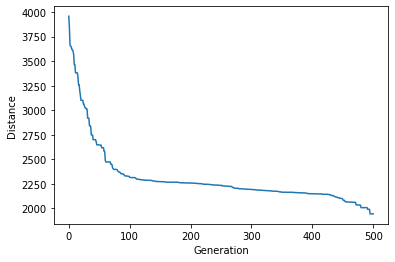

length same =  6
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[5, 21, 2, 18, 14, 17, 22, 11, 15, 16, 20, 10, 4, 19, 13, 25, 7, 23, 27, 8, 24, 1, 28, 9, 6, 12, 3, 26, 29] 1943.9999999999998
[1943.9999999999998, 1943.9999999999998, 1943.9999999999998, 1943.9999999999998, 1943.9999999999998, 1943.9999999999998, 1990.9999999999998, 1990.9999999999998, 1990.9999999999998, 1990.9999999999998, 2008.0, 2008.0, 2008

In [507]:
gens_final = sorted(gens, key=lambda x: x[1])
print("Cel mai bun cromozom", gens_final[-1][0])
print("Fitness score-ul", 1/float(gens_final[-1][1]))
gens_plot = [(1/float(gens_final[i][1])) for i in range(0,len(gens_final))]
plt.plot(gens_plot)
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.show()
print("length same = ", len(same))
for s in same:
  print(s[0], 1/float(s[1]))
print(sorted(gens_plot))

In [508]:
print(problem.node_coord_type)
edges=[(gens_final[-1][0][i],gens_final[-1][0][i+1]) for i in range(len(gens_final[-1][0])-1)]
edges.append((gens_final[-1][0][-1], gens_final[-1][0][0]))
print(edges)

None
[(5, 21), (21, 2), (2, 18), (18, 14), (14, 17), (17, 22), (22, 11), (11, 15), (15, 16), (16, 20), (20, 10), (10, 4), (4, 19), (19, 13), (13, 25), (25, 7), (7, 23), (23, 27), (27, 8), (8, 24), (24, 1), (1, 28), (28, 9), (9, 6), (6, 12), (12, 3), (3, 26), (26, 29), (29, 5)]


(-149.0, 2029.0, 311.0, 2489.0)

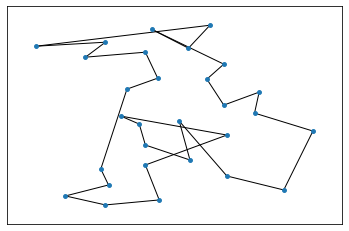

In [509]:
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos=problem.node_coords,node_size=15, ax=ax, nodelist=gens_final[-1][0])
nx.draw_networkx_edges(G, pos=problem.node_coords, ax=ax, edgelist=edges)
plt.axis("on")

In [356]:
problem.node_coords

{1: [1150.0, 1760.0],
 2: [630.0, 1660.0],
 3: [40.0, 2090.0],
 4: [750.0, 1100.0],
 5: [750.0, 2030.0],
 6: [1030.0, 2070.0],
 7: [1650.0, 650.0],
 8: [1490.0, 1630.0],
 9: [790.0, 2260.0],
 10: [710.0, 1310.0],
 11: [840.0, 550.0],
 12: [1170.0, 2300.0],
 13: [970.0, 1340.0],
 14: [510.0, 700.0],
 15: [750.0, 900.0],
 16: [1280.0, 1200.0],
 17: [230.0, 590.0],
 18: [460.0, 860.0],
 19: [1040.0, 950.0],
 20: [590.0, 1390.0],
 21: [830.0, 1770.0],
 22: [490.0, 500.0],
 23: [1840.0, 1240.0],
 24: [1260.0, 1500.0],
 25: [1280.0, 790.0],
 26: [490.0, 2130.0],
 27: [1460.0, 1420.0],
 28: [1260.0, 1910.0],
 29: [360.0, 1980.0]}

In [510]:
matrix = np.loadtxt("/content/tsp_matrix.txt", dtype='i')

In [511]:
print(matrix)

[[ 0  1  2  4]
 [ 1  0  3 15]
 [ 2  3  0  6]
 [ 4 15  6  0]]


In [512]:
G_easy_tsp = nx.from_numpy_array(matrix)

In [513]:
print(G_easy_tsp)

Graph with 4 nodes and 6 edges


In [514]:
best_chrom2, gens2, same2 = genetic_algorithm(G_easy_tsp, 0.08, 0.4, 40, 200, 500)

<ipython-input-343-32cba1659ccb>:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  route = random.sample(G.nodes,len(G.nodes)) #possibly random.choice for cerinta extra


In [516]:
print(best_chrom2[0], 1/float(best_chrom2[1]))

[0, 3, 2, 1] 14.0
